In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPool2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dropout, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [2]:
train = pd.read_csv('C:/Users/Dhruvil/Desktop/train.csv')
test = pd.read_csv('C:/Users/Dhruvil/Desktop/test.csv')

X_train = train.iloc[:, 1:].values
Y_train = train['label']

X_train = X_train/255.0
test = test/255.0

Y_train = to_categorical(Y_train, num_classes = 10)
X_train = X_train.reshape(-1,28,28,1)

dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)

#print(Y_train.shape)
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
###################

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [3]:
model.fit_generator(dataGen.flow(X_train,Y_train,
                                 batch_size=50),
                                 epochs=10,
                                )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
840/840 [==============================] - 177s 210ms/step - loss: 0.2944 - accuracy: 0.9083
Epoch 2/10
840/840 [==============================] - 177s 211ms/step - loss: 0.1178 - accuracy: 0.9643
Epoch 3/10
840/840 [==============================] - 176s 210ms/step - loss: 0.0931 - accuracy: 0.9714
Epoch 4/10
840/840 [==============================] - 171s 203ms/step - loss: 0.0785 - accuracy: 0.9764
Epoch 5/10
840/840 [==============================] - 136s 162ms/step - loss: 0.0687 - accuracy: 0.9789
Epoch 6/10
840/840 [==============================] - 135s 161ms/step - loss: 0.0702 - accuracy: 0.9788
Epoch 7/10
840/840 [==============================] - 132s 158ms/step - loss: 0.0606 - accuracy: 0.9811
Epoch 8/10
840/840 [==============================] - 135s 161ms/step - loss: 0.0592 - accuracy: 0.9825
Epoch 9/10
840/840 [==============================] - 140s 166ms/step - loss: 0.0563 - accur

In [4]:
model.save('C:/Users/Dhruvil/Desktop/trained2.h5')

In [5]:
from keras.models import load_model

model23 = load_model('C:/Users/Dhruvil/Desktop/trained.h5')

test (28000, 28, 28, 1)
0    2
1    0
2    9
3    0
4    3
Name: Label, dtype: int64


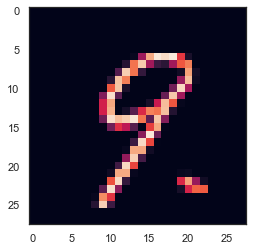

In [6]:
X_test = test.values.reshape(-1,28,28,1)
results = model23.predict(X_test)
print("test", X_test.shape)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

0    2
1    0
2    9
3    0
4    3
Name: Label, dtype: int64


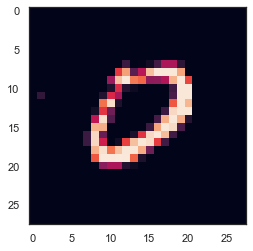

In [7]:
plt.imshow(X_test[3][:,:,0])
print(results.head())

In [8]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv('C:/Users/Dhruvil/Desktop/mnist_2.csv')